# Evaluating speed of prediction for different resnet models in Fastai and Caffe2

## Summary

This notebook has been written to evaluate the speed of prediction for a fastai learner, pytorch model and caffe2 model for the following resnet architectures:
*  resnet18
*  resnet34
*  resnet50
*  resnet101
*  resnet152

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from fastai import *
from fastai.vision import *
import time
import torch

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

## Train the models

### Checking the data

In [4]:
path = './data/happyunhappy/'

### Load data

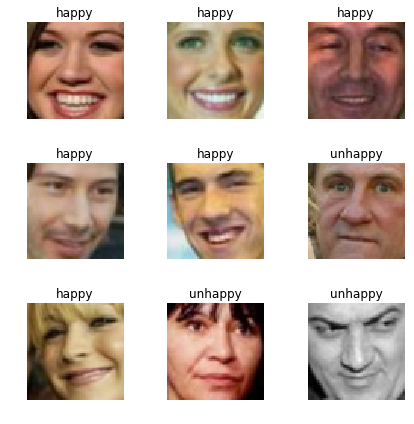

In [5]:
data = ImageDataBunch.from_folder(path, size=64)
data.normalize()
data.show_batch(rows=3, figsize=(6,6))

### Load models

In [6]:
learner_resnet18 = create_cnn(data, models.resnet18, metrics=[accuracy])
learner_resnet34 = create_cnn(data, models.resnet34, metrics=[accuracy])
learner_resnet50 = create_cnn(data, models.resnet50, metrics=[accuracy])
learner_resnet101 = create_cnn(data, models.resnet101, metrics=[accuracy])
learner_resnet152 = create_cnn(data, models.resnet152, metrics=[accuracy])

### Train models

In [ ]:
# learner_resnet18.fit_one_cycle(7, 0.01)

In [ ]:
# learner_resnet34.fit_one_cycle(7, 0.01)

In [ ]:
# learner_resnet50.fit_one_cycle(7, 0.01)

In [ ]:
# learner_resnet101.fit_one_cycle(7, 0.01)

In [ ]:
# learner_resnet152.fit_one_cycle(7, 0.01)

### Save learners

In [ ]:
# learner_resnet18.save('resnet18_g')
# learner_resnet34.save('resnet34_g')
# learner_resnet50.save('resnet50_g')
# learner_resnet101.save('resnet101_g')
# learner_resnet152.save('resnet152_g')

### Load leaners

In [7]:
learner_resnet18.load('resnet18_c')
learner_resnet34.load('resnet34_c')
learner_resnet50.load('resnet50_c')
learner_resnet101.load('resnet101_c')
learner_resnet152.load('resnet152_c')

## Fastai

### Load in test images

In [8]:
img = open_image('./images/happy_col.1.jpg')\

### Time taken to predict

In [9]:
time_dict_fastai = {'fastai': {'resnet18_time': [], 'resnet34_time': [], 'resnet50_time': [], \
                               'resnet101_time': [], 'resnet152_time': []}}

In [10]:
for _ in range(50):
    # resnet18
    start = time.time()
    learner_resnet18.predict(img)
    end = time.time()
    duration = end - start
    time_dict_fastai['fastai']['resnet18_time'].append(duration)
    
    # resnet34
    start = time.time()
    learner_resnet34.predict(img)
    end = time.time()
    duration = end - start
    time_dict_fastai['fastai']['resnet34_time'].append(duration)
    
    #resnet50
    start = time.time()
    learner_resnet50.predict(img)
    end = time.time()
    duration = end - start
    time_dict_fastai['fastai']['resnet50_time'].append(duration)
    
    #resnet101
    start = time.time()
    learner_resnet101.predict(img)
    end = time.time()
    duration = end - start
    time_dict_fastai['fastai']['resnet101_time'].append(duration)
    
    #resnet152
    start =  time.time()
    learner_resnet152.predict(img)
    end = time.time()
    duration = end - start
    time_dict_fastai['fastai']['resnet152_time'].append(duration)

In [11]:
time_dict_fastai

{'fastai': {'resnet18_time': [2.8478665351867676,
   2.9192490577697754,
   2.662226915359497,
   2.658297300338745,
   2.8316550254821777,
   2.7212278842926025,
   2.7807962894439697,
   2.714770555496216,
   2.642385721206665,
   2.648293972015381,
   2.634622097015381,
   2.6580724716186523,
   2.6448683738708496,
   2.6561126708984375,
   2.642852306365967,
   2.6604318618774414,
   2.6576449871063232,
   2.653036594390869,
   2.6799910068511963,
   2.653269052505493,
   2.6165807247161865,
   2.6598947048187256,
   2.6642637252807617,
   2.6435887813568115,
   2.6439902782440186,
   2.6774299144744873,
   2.6213560104370117,
   2.6380274295806885,
   2.6025357246398926,
   2.634624481201172,
   2.6182878017425537,
   2.655693292617798,
   2.632465362548828,
   2.606877565383911,
   2.703725814819336,
   2.7299346923828125,
   2.671983480453491,
   2.649855136871338,
   2.6813642978668213,
   2.6381235122680664,
   2.691462516784668,
   2.6622753143310547,
   2.718350410461426,
  

In [12]:
for key, value in time_dict_fastai['fastai'].items():
    time_dict_fastai['fastai'][key] = sum(value) / float(len(value))

time_dict_fastai

{'fastai': {'resnet18_time': 2.670139021873474,
  'resnet34_time': 4.663958673477173,
  'resnet50_time': 5.390489158630371,
  'resnet101_time': 8.200658779144288,
  'resnet152_time': 10.8205016374588}}

## PyTorch

In [13]:
from torchvision import *
import torch
import PIL

In [ ]:
time_dict_pytorch = {'pytorch': {'resnet18_time': [], 'resnet34_time': [], 'resnet50_time': [], \
                               'resnet101_time': [], 'resnet152_time': []}}

In [ ]:
def image_loader(image_name, imsize=64):
    """load image, returns cuda tensor"""
    loader = transforms.Compose([transforms.Resize(imsize), transforms.ToTensor()])
    image = PIL.Image.open(image_name)
    image = loader(image).float()
    image.clone().detach().requires_grad_(True)
    image = image.unsqueeze(0)
    return image  # add .cuda() if using gpu

In [ ]:
image = image_loader('./images/happy_col.1.jpg')

In [ ]:
for _ in range(1000):
    # resnet18
    start = time.time()
    model = learner_resnet18.model.eval()
    output = model(image).detach().numpy()
    result = np.argmax(output[0])
    if result:
        print("Unhappy")
    else:
        print("Happy")
    end = time.time()
    duration = end - start
    time_dict_pytorch['pytorch']['resnet18_time'].append(duration)
    
    # resnet34
    start = time.time()
    model = learner_resnet34.model.eval()
    output = model(image).detach().numpy()
    result = np.argmax(output[0])
    if result:
        print("Unhappy")
    else:
        print("Happy")
    end = time.time()
    duration = end - start
    time_dict_pytorch['pytorch']['resnet34_time'].append(duration)
    
    # resnet50
    start = time.time()
    model = learner_resnet50.model.eval()
    output = model(image).detach().numpy()
    result = np.argmax(output[0])
    if result:
        print("Unhappy")
    else:
        print("Happy")
    end = time.time()
    duration = end - start
    time_dict_pytorch['pytorch']['resnet50_time'].append(duration)
    
    # resnet101
    start = time.time()
    model = learner_resnet101.model.eval()
    output = model(image).detach().numpy()
    result = np.argmax(output[0])
    if result:
        print("Unhappy")
    else:
        print("Happy")
    end = time.time()
    duration = end - start
    time_dict_pytorch['pytorch']['resnet101_time'].append(duration)
    
    # resnet152
    start = time.time()
    model = learner_resnet152.model.eval()
    output = model(image).detach().numpy()
    result = np.argmax(output[0])
    if result:
        print("Unhappy")
    else:
        print("Happy")
    end = time.time()
    duration = end - start
    time_dict_pytorch['pytorch']['resnet152_time'].append(duration)

Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happ

Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happ

Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happ

Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happ

In [ ]:
time_dict_pytorch

{'pytorch': {'resnet18_time': [0.03621721267700195,
   0.028120994567871094,
   0.028497934341430664,
   0.028181076049804688,
   0.031744956970214844,
   0.02832818031311035,
   0.028199195861816406,
   0.028041362762451172,
   0.02894449234008789,
   0.030759572982788086,
   0.028272151947021484,
   0.028155803680419922,
   0.02834939956665039,
   0.028046131134033203,
   0.032637596130371094,
   0.02811264991760254,
   0.028133630752563477,
   0.028177976608276367,
   0.04198098182678223,
   0.033261775970458984,
   0.028140783309936523,
   0.02822399139404297,
   0.02823019027709961,
   0.028463363647460938,
   0.03307008743286133,
   0.0282742977142334,
   0.02810502052307129,
   0.02821183204650879,
   0.028853893280029297,
   0.028357267379760742,
   0.04302644729614258,
   0.028005123138427734,
   0.028116464614868164,
   0.02808690071105957,
   0.0288236141204834,
   0.03149223327636719,
   0.028882265090942383,
   0.02845907211303711,
   0.02834939956665039,
   0.028225183486

In [ ]:
for key, value in time_dict_pytorch['pytorch'].items():
    time_dict_pytorch['pytorch'][key] = sum(value) / float(len(value))

time_dict_pytorch

{'pytorch': {'resnet18_time': 0.02936687684059143,
  'resnet34_time': 0.056080282688140866,
  'resnet50_time': 0.06640854501724243,
  'resnet101_time': 0.11652218890190125,
  'resnet152_time': 0.15657751393318176}}

## Caffe2

### Convert models to onnx

In [ ]:
# from torch.autograd import Variable
# import torch.onnx
# import torchvision
# import os

In [ ]:
# dummy_input = Variable(torch.randn(64, 3, 64, 64))
# input_names = [ "actual_input_1" ]
# output_names = [ "output1" ]

In [ ]:
# if not os.path.isdir('./onnx_models/'):
#     os.mkdir('./onnx_models/')

# torch.onnx.export(learner_resnet18.model,dummy_input,'./onnx_models/resnet18.onnx', verbose=True, \
#                   input_names=input_names, output_names=output_names)
# torch.onnx.export(learner_resnet34.model,dummy_input,'./onnx_models/resnet34.onnx', verbose=True, \
#                   input_names=input_names, output_names=output_names)
# torch.onnx.export(learner_resnet50.model,dummy_input,'./onnx_models/resnet50.onnx', verbose=True, \
#                   input_names=input_names, output_names=output_names)
# torch.onnx.export(learner_resnet101.model,dummy_input,'./onnx_models/resnet101.onnx', verbose=True, \
#                   input_names=input_names, output_names=output_names)
# torch.onnx.export(learner_resnet152.model,dummy_input,'./onnx_models/resnet152.onnx', verbose=True, \
#                   input_names=input_names, output_names=output_names)

### Load models into Caffe2

In [ ]:
import caffe2.python.onnx.backend as backend
import numpy as np
import onnx
import cv2
import caffe2

In [ ]:
onnx_resnet18_c = onnx.load('./onnx_models/resnet18_c.onnx')
onnx_resnet34_c = onnx.load('./onnx_models/resnet34_c.onnx')
onnx_resnet50_c = onnx.load('./onnx_models/resnet50_c.onnx')
onnx_resnet101_c = onnx.load('./onnx_models/resnet101_c.onnx')
onnx_resnet152_c = onnx.load('./onnx_models/resnet152_c.onnx')

In [ ]:
caffe_resnet18_c = backend.prepare(onnx_resnet18_c, device='CPU')
caffe_resnet34_c = backend.prepare(onnx_resnet34_c, device='CPU')
caffe_resnet50_c = backend.prepare(onnx_resnet50_c, device='CPU')
caffe_resnet101_c = backend.prepare(onnx_resnet101_c, device='CPU')
caffe_resnet152_c = backend.prepare(onnx_resnet152_c, device='CPU')

### Convert images for Caffe2 use

In [ ]:
img2 = open_image('./images/happy_col.1.jpg')

In [ ]:
mn,std = imagenet_stats
img_norm = normalize(img2.px, torch.tensor(mn), torch.tensor(std))
img2 = img_norm.numpy()
img2 = np.expand_dims(img2, axis=0)

### Time Caffe2 models

In [ ]:
time_dict_caffe = {'caffe':{'resnet18_time': [], 'resnet34_time': [], 'resnet50_time': [], \
                            'resnet101_time': [], 'resnet152_time': []}}

In [ ]:
for _ in range(1000):
    # resnet18
    start = time.time()
    outputs = caffe_resnet18_c.run(img2.astype(np.float32))
    result = np.argmax(outputs[0][0])
    if result == 0:
        print('Happy')
    elif result == 1:
        print('Unhappy')
    end = time.time()
    duration = end - start
    time_dict_caffe['caffe']['resnet18_time'].append(duration)
    
    # resnet34
    start = time.time()
    outputs = caffe_resnet34_c.run(img2.astype(np.float32))
    result = np.argmax(outputs[0][0])
    if result == 0:
        print('Happy')
    elif result == 1:
        print('Unhappy')
    end = time.time()
    duration = end - start
    time_dict_caffe['caffe']['resnet34_time'].append(duration)
    
    # resnet50
    start = time.time()
    outputs = caffe_resnet50_c.run(img2.astype(np.float32))
    result = np.argmax(outputs[0][0])
    if result == 0:
        print('Happy')
    elif result == 1:
        print('Unhappy')
    end = time.time()
    duration = end - start
    time_dict_caffe['caffe']['resnet50_time'].append(duration)
    
    # resnet101
    start = time.time()
    outputs = caffe_resnet101_c.run(img2.astype(np.float32))
    result = np.argmax(outputs[0][0])
    if result == 0:
        print('Happy')
    elif result == 1:
        print('Unhappy')
    end = time.time()
    duration = end - start
    time_dict_caffe['caffe']['resnet101_time'].append(duration)
    
    # resnet152
    start = time.time()
    outputs = caffe_resnet152_c.run(img2.astype(np.float32))
    result = np.argmax(outputs[0][0])
    if result == 0:
        print('Happy')
    elif result == 1:
        print('Unhappy')
    end = time.time()
    duration = end - start
    time_dict_caffe['caffe']['resnet152_time'].append(duration)

In [ ]:
time_dict_caffe

In [ ]:
for key, value in time_dict_caffe['caffe'].items():
    time_dict_caffe['caffe'][key] = sum(value) / float(len(value))
    
time_dict_caffe

## Organise results

In [ ]:
import pandas as pd

In [ ]:
time_dict = {**time_dict_fastai, **time_dict_pytorch, **time_dict_caffe}
time_dict

In [ ]:
model_names = ['resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152']
num_of_layers = [18, 34, 50, 101, 152]
fastai_times = []
pytorch_times = []
caffe2_times = []
for _, value in time_dict['fastai'].items():
    fastai_times.append(value)
for _, value in time_dict['pytorch'].items():
    pytorch_times.append(value)
for _, value in time_dict['caffe'].items():
    caffe2_times.append(value)
   
df = pd.DataFrame({'model_name': model_names, 'num_of_layers': num_of_layers, 'fastai_time': fastai_times, \
                   'pytorch_time': pytorch_times, 'caffe2_time': caffe2_times})
df

In [ ]:
df.to_csv('time_info.csv')

# Plot results

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df.plot(kind='bar', x='model_name', y=['fastai_time', 'pytorch_time', 'caffe2_time'])
plt.show()

In [ ]:
df.plot(kind='bar', x='model_name', y=['pytorch_time', 'caffe2_time'])
plt.show()